<a href="https://colab.research.google.com/github/pmukeshreddy/hands-on-machine-leaning-book-projects/blob/main/polyreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

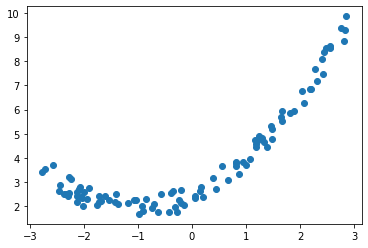

In [ ]:
m = 100
x = 6*np.random.rand(m,1)-3
y = 0.5*x**2+x+2+np.random.rand(m,1)
plt.scatter(x,y)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
ploy_r = PolynomialFeatures(degree=2,include_bias=False)
x_new = ploy_r.fit_transform(x)


In [ ]:
x_new[0]

array([-0.58170394,  0.33837947])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_m = LinearRegression()
lin_m.fit(x_new,y)
print(lin_m.intercept_)
print(lin_m.coef_)


[2.50116901]
[[1.02146057 0.50073032]]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curve(model,x,y):
    x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)
    train_score,validation_score=[],[]
    for m in range(1,len(x_train)):
        model.fit(x[:m],y[:m])
        y_predict_train = model.predict(x_train[:m])
        y_predict_val = model.predict(x_val)
        train_score.append(mean_squared_error(y_train[:m],y_predict_train))
        validation_score.append(mean_squared_error(y_val,y_predict_val))
    plt.plot(np.sqrt(train_score),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(validation_score), "b-", linewidth=3, label="val")
    plt.legend()

        


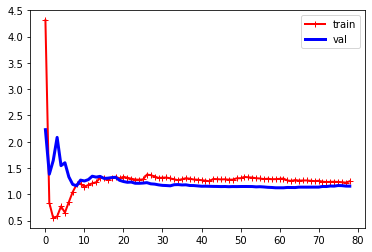

In [ ]:
l_m=LinearRegression()
plot_learning_curve(l_m,x,y)

C:\Users\91832\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91832\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91832\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\91832\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\

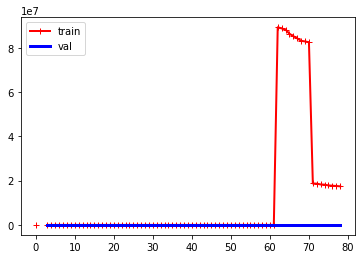

In [ ]:
from sklearn.pipeline import Pipeline
p_l=Pipeline([
    ("ploy_1",PolynomialFeatures(degree=500,include_bias=False)),
    ("lin_reg",LinearRegression())
])
plot_learning_curve(p_l,x,y)

In [ ]:
r_model=Ridge(alpha=1,solver="cholesky")
r_model.fit(x,y)
r_model.predict([[1.5]])

array([[5.53675922]])

In [ ]:
r_model.intercept_

array([3.95036927])

In [ ]:
r_model.coef_

array([[1.0575933]])

In [ ]:
g_model=SGDRegressor(penalty="l2")
g_model.fit(x,y.ravel())
g_model.predict([[1.5]])


array([5.5019291])

In [ ]:
l_model=Lasso(alpha=0.1)
l_model.fit(x,y)
l_predict=l_model.predict([[1.5]])
l_predict

array([5.4898539])

In [ ]:
e_model=ElasticNet()
e_model.fit(x,y)
e_model.predict([[1.5]])

array([5.08138756])

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)

In [ ]:
poly_scalr = Pipeline([("ploy_features", PolynomialFeatures(
    degree=90, include_bias=False)), ("s_scalre", StandardScaler())])
x_train_polt_trained = poly_scalr.fit_transform(x_train)
x_val_polt_tr = poly_scalr.transform(x_val)
s_model_s = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                         penalty=None, learning_rate="constant", eta0=0.0005)
min_val_error=float("inf")
beat_epoch=None
best_model=None
for epoch in range(1000):
    s_model_s.fit(x_val_polt_tr,y_val)
    s_pridication=s_model_s.predict(x_val_polt_tr)
    err=mean_absolute_error(y_val,s_pridication)
    if err<min_val_error:
        best_epoch=epoch
        best_model=clone(s_model_s)
        min_val_error=err

C:\Users\91832\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91832\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91832\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 